# ECON 626 Prediction Competition 5 Code


Objective: Utilize ensemble machine learning algorithms (Bagging, Random Forest, Boosting) to train a model that predicts the natural logarithm of car price.

## Importing Librarys

In [58]:
import numpy as np
import pandas as pd
from pandas import get_dummies
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model # Linear regression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import \
(RandomForestRegressor as RF,
GradientBoostingRegressor as GBR)
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVR, LinearSVR


## Importing data

In [59]:
small_data_path = "/Users/andrew/Downloads/UW courses/ECON 626/Prediction Competition 4/pc3_and_pc4_training_data_small_v1.csv"
small_df= pd.read_csv(small_data_path)
#create a dataframe for our smaller dataset

large_data_path = "/Users/andrew/Downloads/UW courses/ECON 626/Prediction Competition 4/pc3_and_pc4_training_data_large_v1.csv"
large_df = pd.read_csv(large_data_path)
#create a dataframe for our larger dataset

pc5_data_path = "/Users/andrew/Downloads/UW courses/ECON 626/Prediction Competition 5/MLforEcon_W2024_pc5_train_v1.csv"
pc5_df = pd.read_csv(pc5_data_path)

test_data_path = "/Users/andrew/Downloads/UW courses/ECON 626/Prediction Competition 5/MLforEcon_W2024_pc5_test_without_response.csv"
test_df = pd.read_csv(test_data_path)
#create a dataframe for our larger dataset

response_df_path = "/Users/andrew/Downloads/UW courses/ECON 626/Prediction Competition 5/MLforEcon_W2024_pc5_test_with_response.csv"
response_df = pd.read_csv(response_df_path)

total_df  = pd.concat([small_df, pc5_df], axis = 0)
#create a dataframe containing both small and pc5 df

fixed_df  = pd.concat([small_df, large_df, pc5_df], axis = 0)
#create a dataframe containing both small and pc5 df

testing_df_path1 = "/Users/andrew/Downloads/UW courses/ECON 626/Prediction Competition 5/pc3_test_data_without_response_v1.csv"
testing_df1 = pd.read_csv(testing_df_path1)

testing_df_path2 = "/Users/andrew/Downloads/UW courses/ECON 626/Prediction Competition 5/pc3_test_data_with_response_v1.csv"
testing_df2 = pd.read_csv(testing_df_path2)


## Inspect data

In [60]:
#function:
def inspect_dataset(dataset):
    # Print the head of the dataset
    print("Head of the dataset:")
    print(dataset.head())
    print("\n")

    # Print the info of the dataset
    print("Info of the dataset:")
    print(dataset.info())
    print("\n")

    # Print the shape of the dataset
    print("Shape of the dataset:")
    print(dataset.shape)
    print("\n")

    # Print value counts for columns of type object
    object_columns = dataset.select_dtypes(include=['object']).columns
    for column in object_columns:
        print(f"Value counts for column '{column}':")
        print(dataset[column].value_counts())
        print("\n")

In [61]:
pc5_df.head()

,price,back_legroom,body_type,engine_displacement,exterior_color,fuel_type,height,highway_fuel_economy,horsepower,latitude,length,listed_date,longitude,mileage,wheel_system,wheelbase,width,year
0,12500.0,39.9 in,SUV / Crossover,2400,Silver Ice Metallic,Gasoline,66.3 in,29,182,44.134399,187.8 in,2020-07-21,-70.225601,89331,AWD,112.5 in,72.5 in,2015
1,11971.0,35.4 in,Hatchback,2000,Dark Gray Metallic,Gasoline,57.7 in,36,148,40.873699,174 in,2020-08-19,-74.432999,95814,AWD,104.1 in,68.5 in,2016
2,8750.0,37.4 in,Sedan,1800,Silver,Gasoline,58.9 in,39,130,34.247601,182.1 in,2020-05-14,-111.323000,74437,FWD,106.3 in,69.3 in,2014
3,7000.0,31.7 in,Hatchback,1400,-Verde Oliva,Gasoline,59.8 in,34,101,35.904900,139.6 in,2020-08-20,-84.120903,50030,FWD,90.6 in,64.1 in,2012
4,11999.0,35.1 in,SUV / Crossover,2400,Black,Gasoline,66.5 in,29,180,35.174500,166.6 in,2020-07-22,-80.748100,92978,4WD,101.2 in,79.6 in,2015


In [62]:
pc5_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   price                 100000 non-null  float64
 1   back_legroom          100000 non-null  object 
 2   body_type             100000 non-null  object 
 3   engine_displacement   100000 non-null  int64  
 4   exterior_color        97228 non-null   object 
 5   fuel_type             100000 non-null  object 
 6   height                100000 non-null  object 
 7   highway_fuel_economy  100000 non-null  int64  
 8   horsepower            100000 non-null  int64  
 9   latitude              100000 non-null  float64
 10  length                100000 non-null  object 
 11  listed_date           100000 non-null  object 
 12  longitude             100000 non-null  float64
 13  mileage               100000 non-null  int64  
 14  wheel_system          100000 non-null  object 
 15  w

In [63]:
pc5_df.isna().sum()

price                      0
back_legroom               0
body_type                  0
engine_displacement        0
exterior_color          2772
fuel_type                  0
height                     0
highway_fuel_economy       0
horsepower                 0
latitude                   0
length                     0
listed_date                0
longitude                  0
mileage                    0
wheel_system               0
wheelbase                  0
width                      0
year                       0
dtype: int64

In [64]:
pc5_df.shape

(100000, 18)

In [65]:
# Assuming pc5_df is a pandas DataFrame
propane_count = pc5_df['fuel_type'].value_counts().get('Propane', 0)

print("Number of 'Propane' entries in pc5_df:", propane_count)

Number of 'Propane' entries in pc5_df: 2


In [66]:
# Assuming pc5_df is a pandas DataFrame
pc5_df['fuel_type'] = pc5_df['fuel_type'].replace('Propane', 'Gasoline')

# Now you can count the 'Gasoline' entries
gasoline_count = pc5_df['fuel_type'].value_counts().get('Gasoline', 0)

print("Number of 'Gasoline' entries in pc5_df:", gasoline_count)


Number of 'Gasoline' entries in pc5_df: 92535


In [67]:
# Assuming pc5_df is a pandas DataFrame
propane_count = pc5_df['fuel_type'].value_counts().get('Propane', 0)

print("Number of 'Propane' entries in pc5_df:", propane_count)

Number of 'Propane' entries in pc5_df: 0


## Data Visualizations

<Axes: xlabel='body_type'>

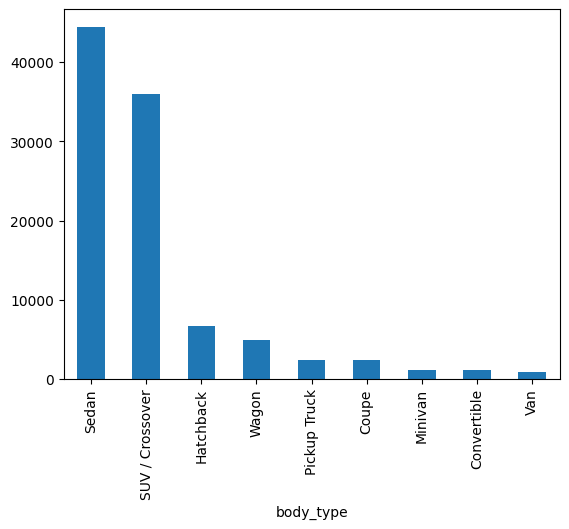

In [68]:
pc5_df['body_type'].value_counts().plot(kind='bar')

<Axes: xlabel='fuel_type'>

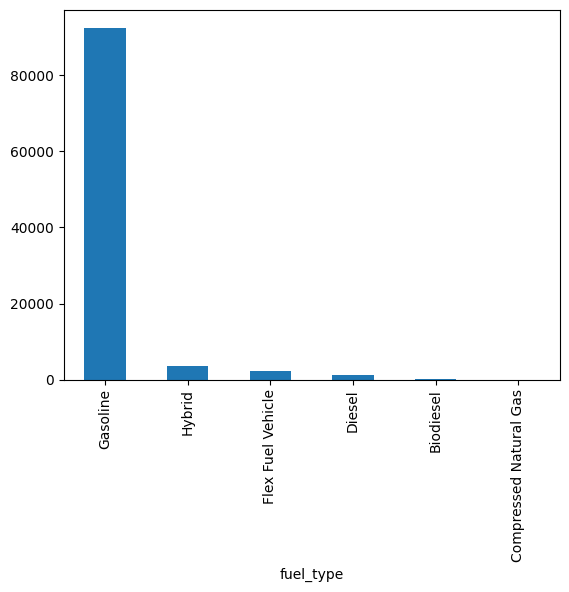

In [69]:
pc5_df['fuel_type'].value_counts().plot(kind='bar')

<Axes: xlabel='wheel_system'>

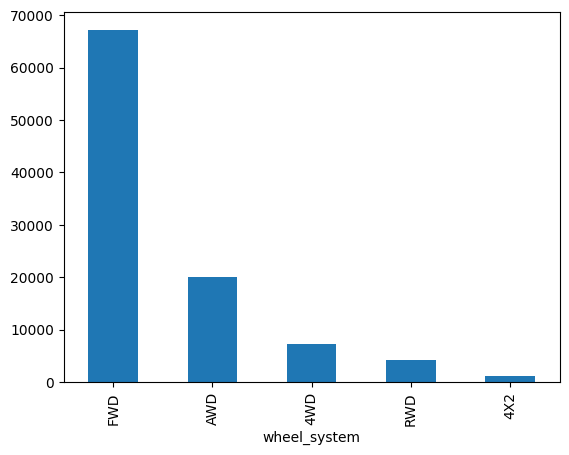

In [70]:
pc5_df['wheel_system'].value_counts().plot(kind='bar')


In [71]:
numerical_columns = small_df.select_dtypes(include=np.number).columns.tolist()

num_drop_list = 'latitude', 'price', 'longitude'

numerical_columns = list(set(numerical_columns) - set(num_drop_list))

In [72]:
categorical_columns = small_df.select_dtypes(exclude=np.number).columns.tolist()
categorical_columns

cat_drop_list = 'back_legroom', 'height', 'length', 'listed_date', 
'wheelbase', 'width', 'exterior_color'

categorical_columns = list(set(categorical_columns) - set(cat_drop_list))

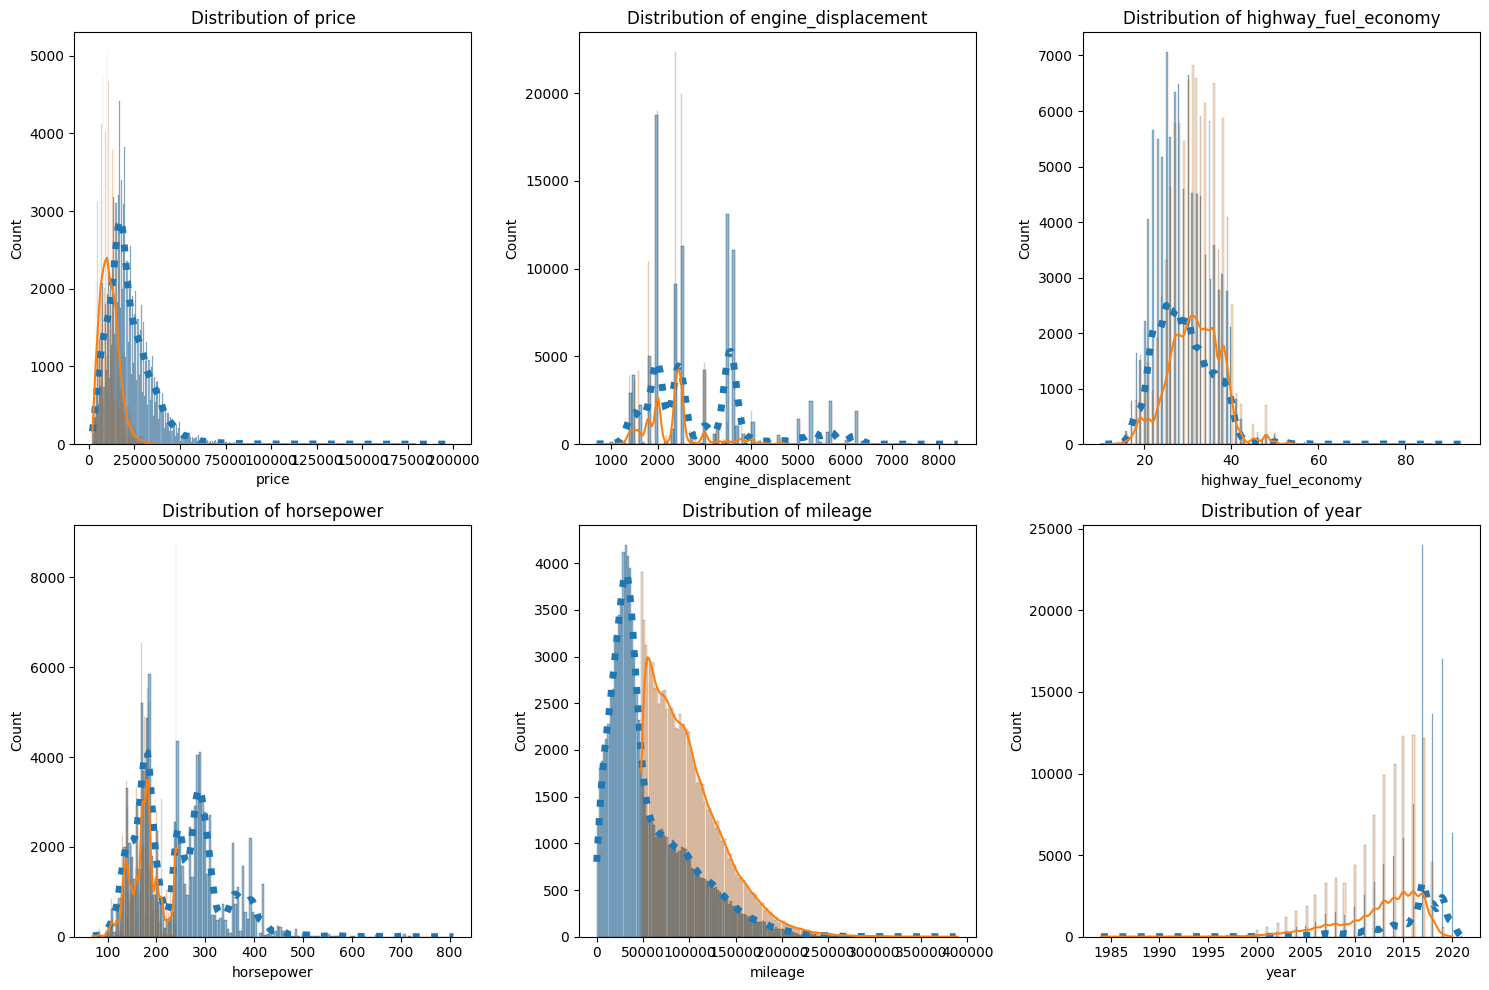

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

og_cols = ['price', 'engine_displacement', 'highway_fuel_economy', 
           'horsepower', 'mileage', 'year']
num_cols = len(og_cols)

# Calculate the number of rows and columns needed for subplots
num_rows = (num_cols + 2) // 3  # Ceiling division to ensure we have enough rows
num_cols = min(num_cols, 3)  # Limit the number of columns to 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10)) 

for i, col in enumerate(og_cols):
    row_idx = i // num_cols
    col_idx = i % num_cols

    if num_rows == 1:
        ax = axes[col_idx]
    else:
        ax = axes[row_idx, col_idx]

    sns.histplot(small_df[col], ax=ax, kde=True, line_kws={
        'lw': 5, 'ls': ':'})
    sns.histplot(pc5_df[col], ax=ax, kde=True, alpha=0.25)
    #sns.histplot(large_df[col], ax=ax, kde=True, alpha=0.25)
    
    ax.set_title('Distribution of ' + col)

# Adjust layout to prevent overlap of subplots
plt.tight_layout()
plt.show()


/var/folders/g9/7gqbb_gn4tv717l8v7pyt28c0000gn/T/ipykernel_58525/721232414.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
/var/folders/g9/7gqbb_gn4tv717l8v7pyt28c0000gn/T/ipykernel_58525/721232414.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
/var/folders/g9/7gqbb_gn4tv717l8v7pyt28c0000gn/T/ipykernel_58525/721232414.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


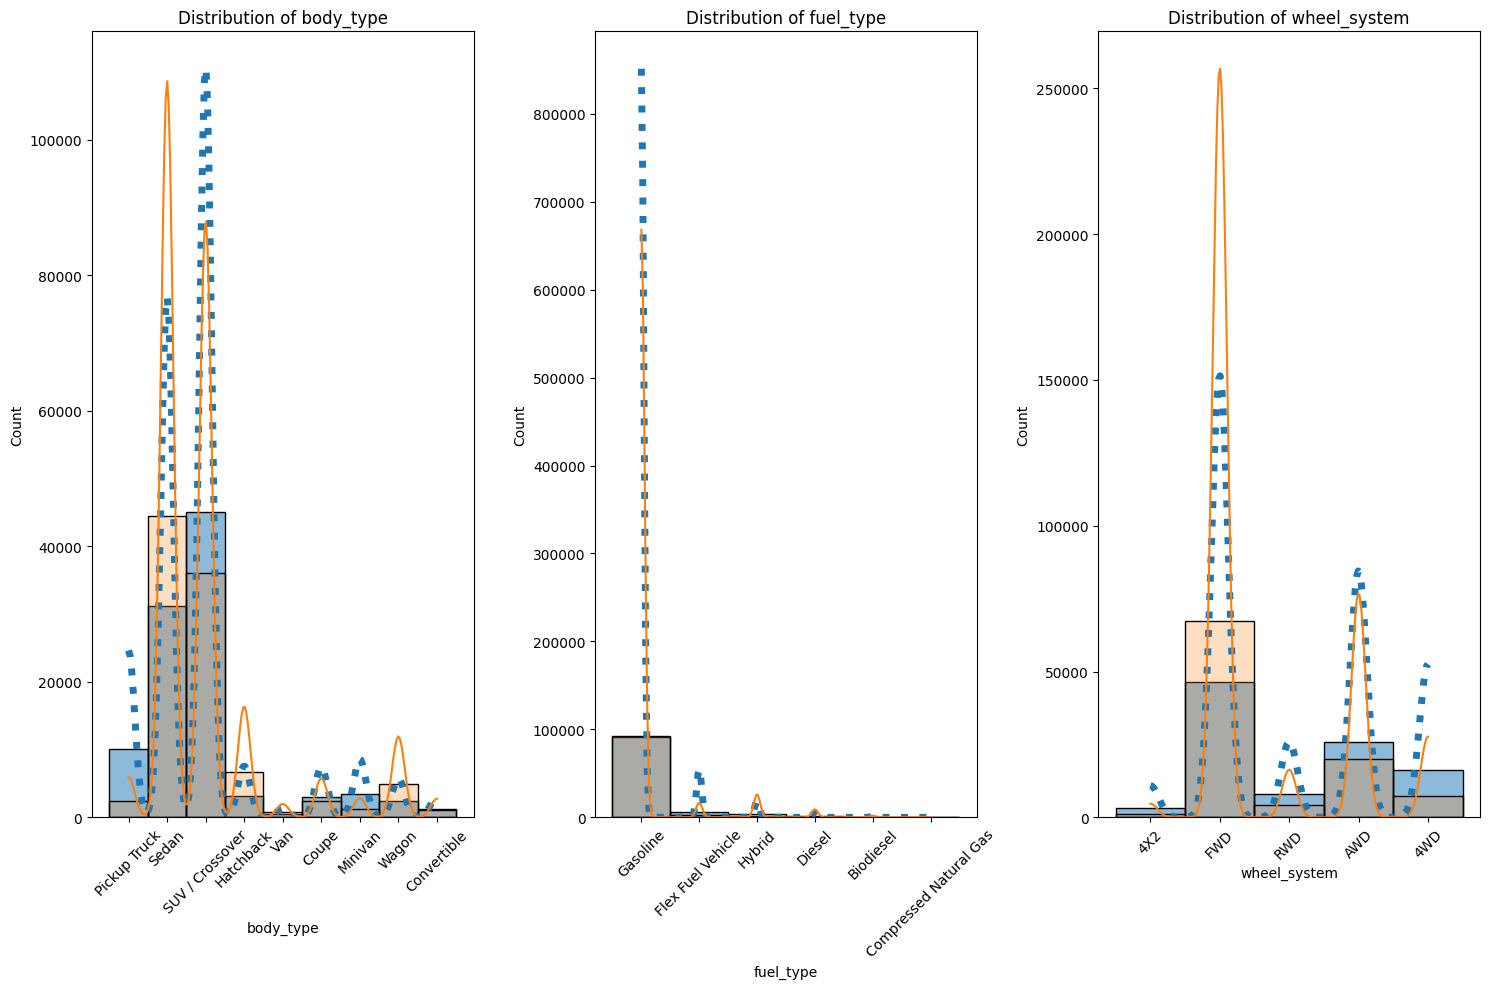

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

og_cat_cols = ['body_type', 'fuel_type', 'wheel_system']
num_cols = len(og_cat_cols)

# Calculate the number of rows and columns needed for subplots
num_rows = (num_cols + 2) // 3  # Ceiling division to ensure we have enough rows
num_cols = min(num_cols, 3)  # Limit the number of columns to 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

for i, col in enumerate(og_cat_cols):
    row_idx = i // num_cols
    col_idx = i % num_cols
    
    if num_rows == 1:
        ax = axes[col_idx]
    else:
        ax = axes[row_idx, col_idx]

    sns.histplot(small_df[col], ax=ax, kde=True, line_kws={
        'lw': 5, 'ls': ':'}) 
    sns.histplot(pc5_df[col], ax=ax, kde=True, alpha=0.25)
    
    ax.set_title('Distribution of ' + col)
    
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
# Adjust layout to prevent overlap of subplots
plt.tight_layout()
plt.show()


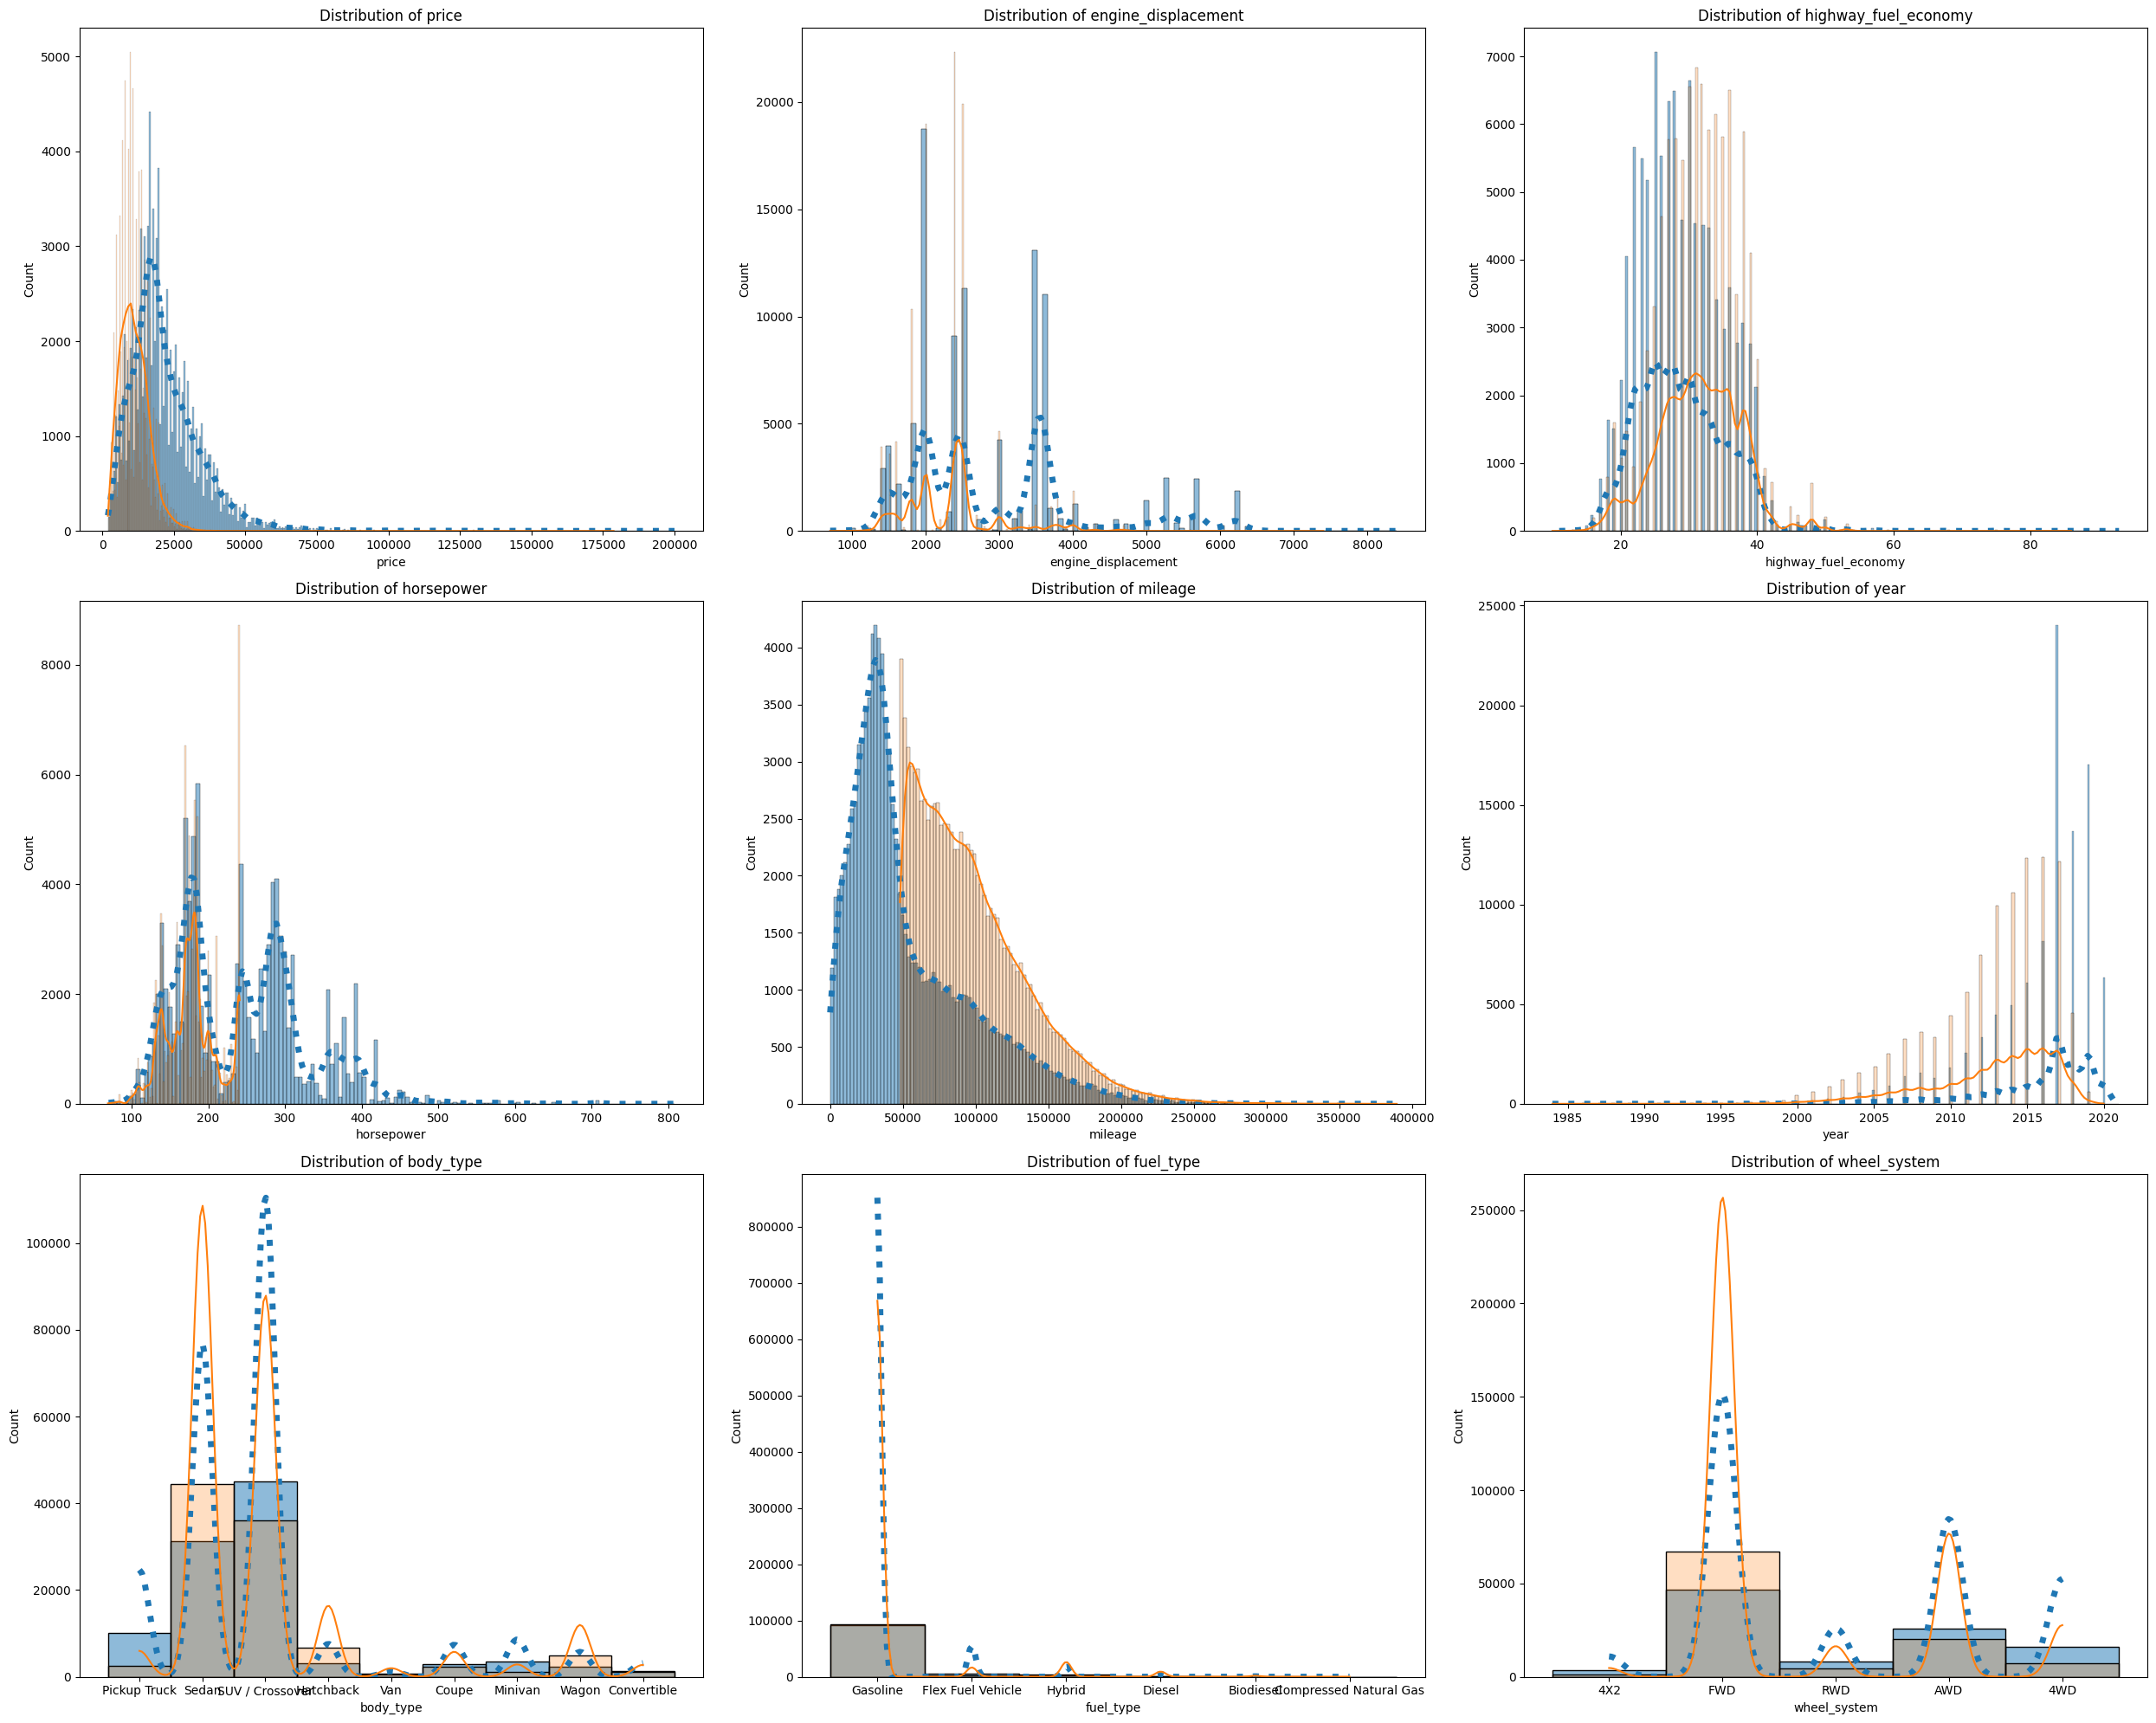

In [75]:
og_cols = ['price', 'engine_displacement', 'highway_fuel_economy', 
           'horsepower', 'mileage', 'year', 'body_type', 
           'fuel_type', 'wheel_system']
num_cols = len(og_cols)

# Calculate the number of rows and columns needed for subplots
num_rows = (num_cols + 2) // 3  # Ceiling division to ensure we have enough rows
num_cols = min(num_cols, 3)  # Limit the number of columns to 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(25, 20)) 

for i, col in enumerate(og_cols):
    row_idx = i // num_cols
    col_idx = i % num_cols

    if num_rows == 1:
        ax = axes[col_idx]
    else:
        ax = axes[row_idx, col_idx]

    sns.histplot(small_df[col], ax=ax, kde=True, line_kws={
        'lw': 5, 'ls': ':'})  # Add KDE plot
    sns.histplot(pc5_df[col], ax=ax, kde=True, alpha=0.25)
    #sns.histplot(large_df[col], ax=ax, kde=True, alpha=0.25)
    
    ax.set_title('Distribution of ' + col)

# Adjust layout to prevent overlap of subplots
plt.tight_layout()
plt.show()

Since we see that the distributions of the datasets are different I will be taking a random sample from the total dataframe to get an average distribution between both of the distributions.

In [76]:
small_df['fuel_type'].unique()

array(['Gasoline', 'Flex Fuel Vehicle', 'Hybrid', 'Diesel', 'Biodiesel',
       'Compressed Natural Gas'], dtype=object)

In [77]:
pc5_df['fuel_type'].unique()

array(['Gasoline', 'Flex Fuel Vehicle', 'Diesel', 'Hybrid', 'Biodiesel',
       'Compressed Natural Gas'], dtype=object)

In [78]:
# total_df = total_df[total_df['body_type'] != 'Minivan']

# total_df = total_df[~total_df
#                     ['fuel_type'].isin(
#                         ['Compressed Natural Gas', 'Diesel', 
#                          'Flex Fuel Vehicle', 'Propane'])]



In [79]:
total_df  = pd.concat([small_df, pc5_df], axis = 0)
#create a dataframe containing both small and pc5 df

In [80]:
total_df['fuel_type'].unique()

array(['Gasoline', 'Flex Fuel Vehicle', 'Hybrid', 'Diesel', 'Biodiesel',
       'Compressed Natural Gas'], dtype=object)

In [81]:
subset_df = total_df.sample(n=125000, random_state=4)

In [82]:
propane_count = subset_df['fuel_type'].eq(
    'propane').sum()

In [83]:
propane_count

0

In [84]:
fixed_df = fixed_df[(fixed_df['year'] > 2016) & (fixed_df['horsepower'] > 300) & (fixed_df['mileage'] < 45000)]


fixed_df = fixed_df.sample(n=40000, random_state=4)

# Display the filtered DataFrame
print(fixed_df.shape)

(40000, 18)


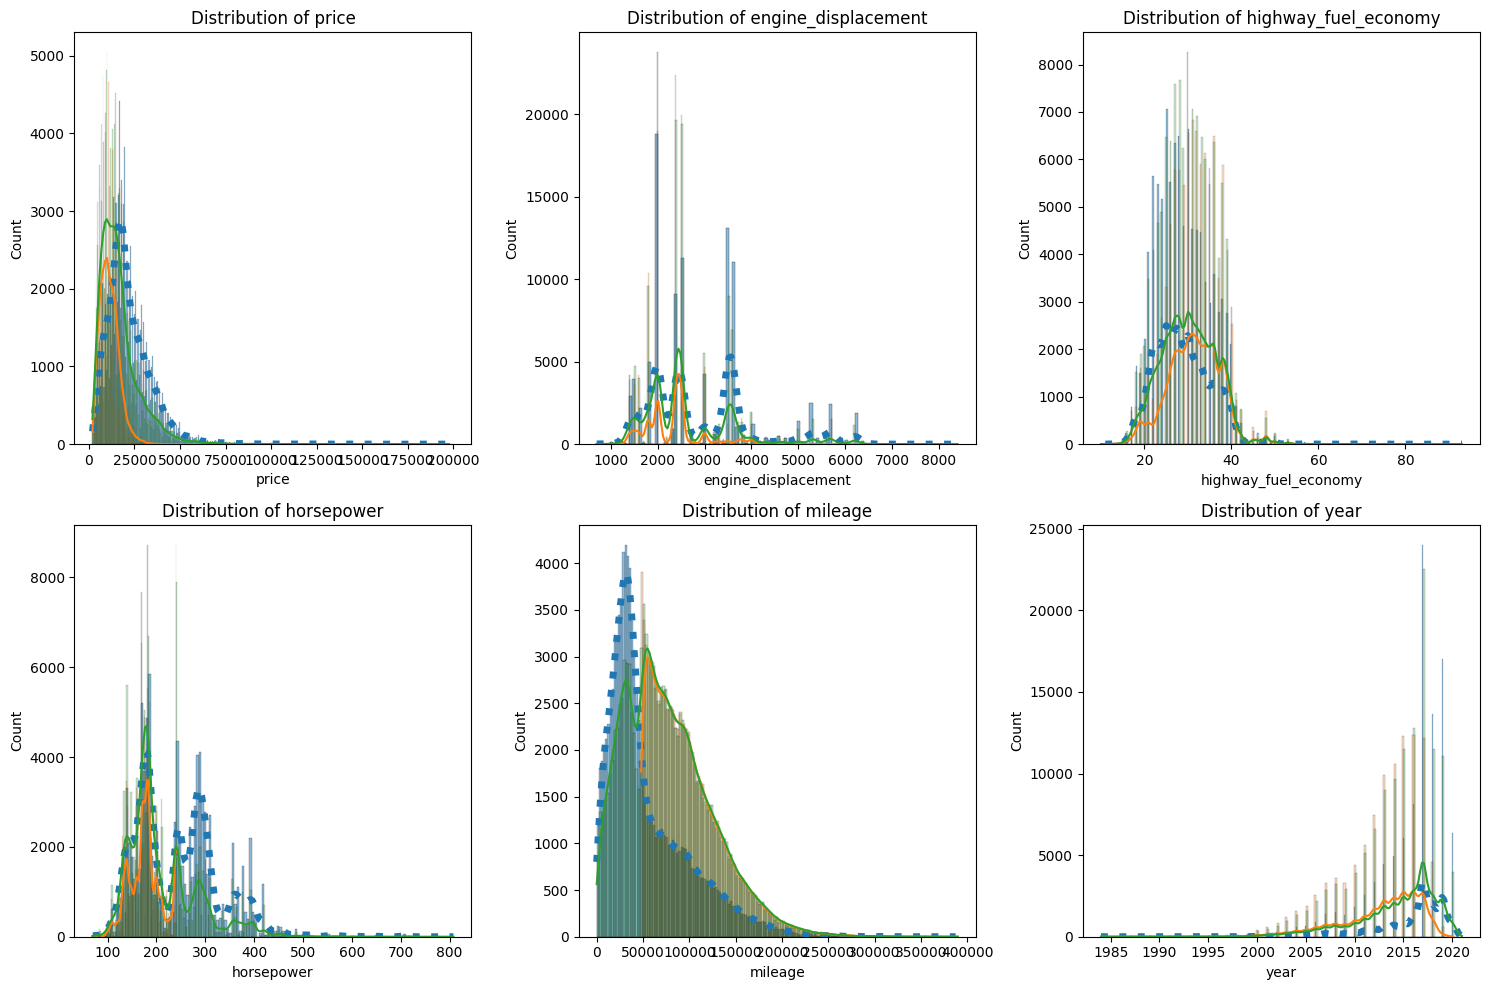

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

og_cols = ['price', 'engine_displacement', 
           'highway_fuel_economy', 'horsepower', 'mileage', 
           'year']
num_cols = len(og_cols)

# Calculate the number of rows and columns needed for subplots
num_rows = (num_cols + 2) // 3  # Ceiling division to ensure we have enough rows
num_cols = min(num_cols, 3)  # Limit the number of columns to 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10)) 

for i, col in enumerate(og_cols):
    row_idx = i // num_cols
    col_idx = i % num_cols

    if num_rows == 1:
        ax = axes[col_idx]
    else:
        ax = axes[row_idx, col_idx]

    sns.histplot(small_df[col], ax=ax, kde=True, line_kws={
        'lw': 5, 'ls': ':'})
    sns.histplot(pc5_df[col], ax=ax, kde=True, alpha=0.25)
    sns.histplot(subset_df[col], ax=ax, kde=True, alpha=0.25)
    
    ax.set_title('Distribution of ' + col)

# Adjust layout to prevent overlap of subplots
plt.tight_layout()
plt.show()

/var/folders/g9/7gqbb_gn4tv717l8v7pyt28c0000gn/T/ipykernel_58525/2715228621.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
/var/folders/g9/7gqbb_gn4tv717l8v7pyt28c0000gn/T/ipykernel_58525/2715228621.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
/var/folders/g9/7gqbb_gn4tv717l8v7pyt28c0000gn/T/ipykernel_58525/2715228621.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


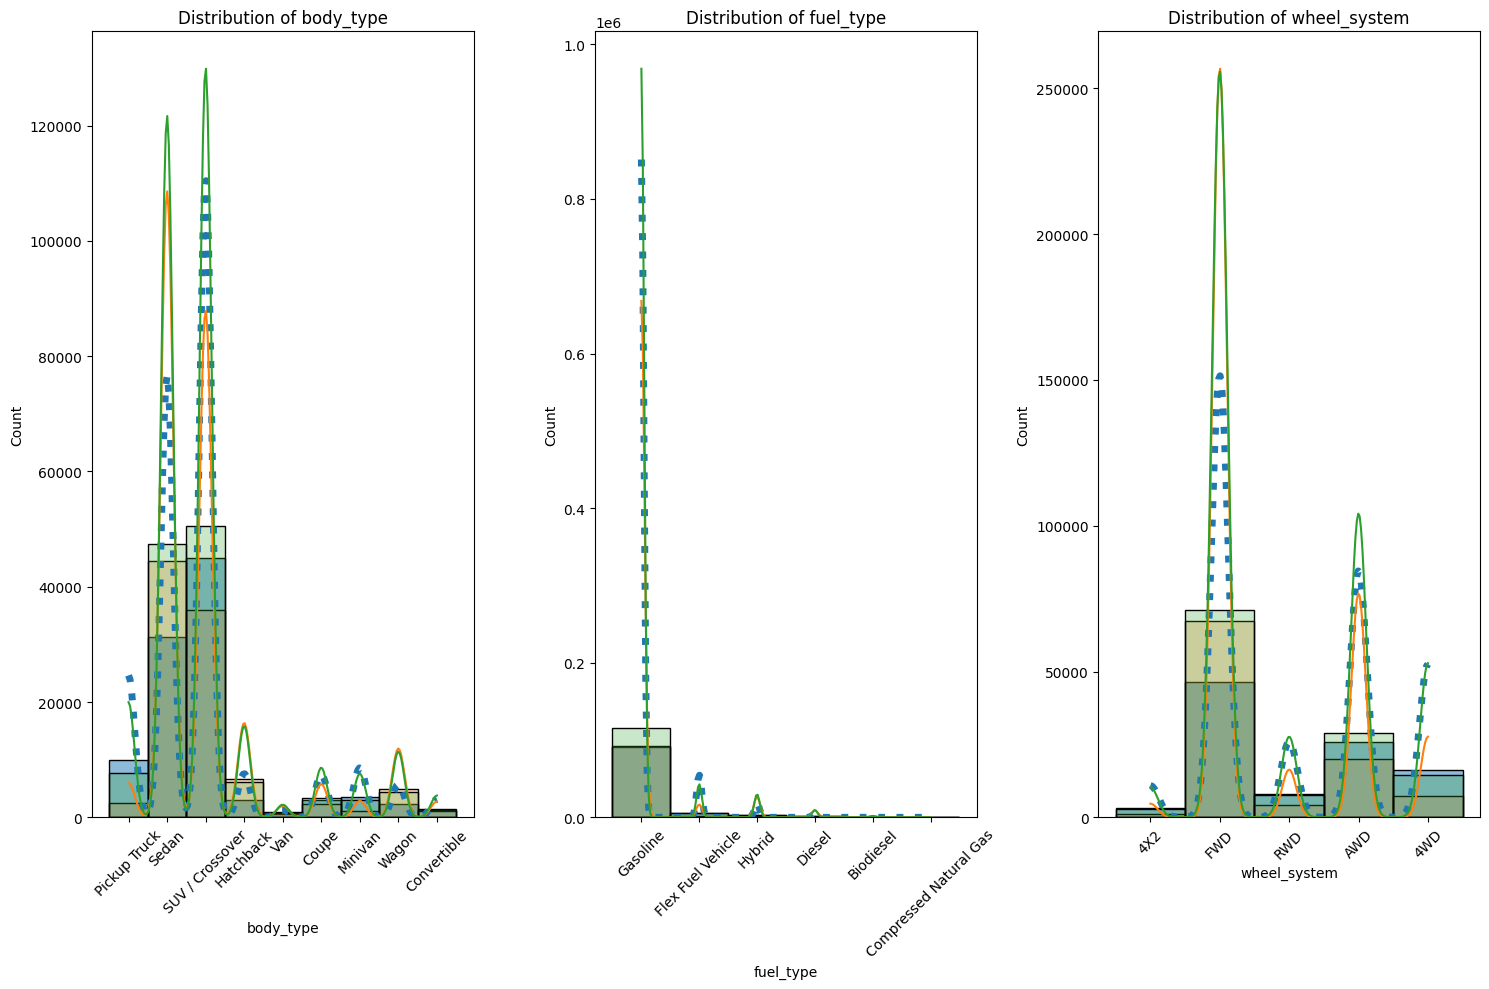

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

og_cat_cols = ['body_type', 'fuel_type', 'wheel_system']
num_cols = len(og_cat_cols)

# Calculate the number of rows and columns needed for subplots
num_rows = (num_cols + 2) // 3  # Ceiling division to ensure we have enough rows
num_cols = min(num_cols, 3)  # Limit the number of columns to 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10)) 

for i, col in enumerate(og_cat_cols):
    row_idx = i // num_cols
    col_idx = i % num_cols
    
    if num_rows == 1:
        ax = axes[col_idx]
    else:
        ax = axes[row_idx, col_idx]

    sns.histplot(small_df[col], ax=ax, kde=True, line_kws={
        'lw': 5, 'ls': ':'}) 
    sns.histplot(pc5_df[col], ax=ax, kde=True, alpha=0.25)
    sns.histplot(subset_df[col], ax=ax, kde=True, alpha=0.25)
    
    ax.set_title('Distribution of ' + col)
    
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
# Adjust layout to prevent overlap of subplots
plt.tight_layout()
plt.show()

Here we see that we have successfully found a distribution that represents both datasets.

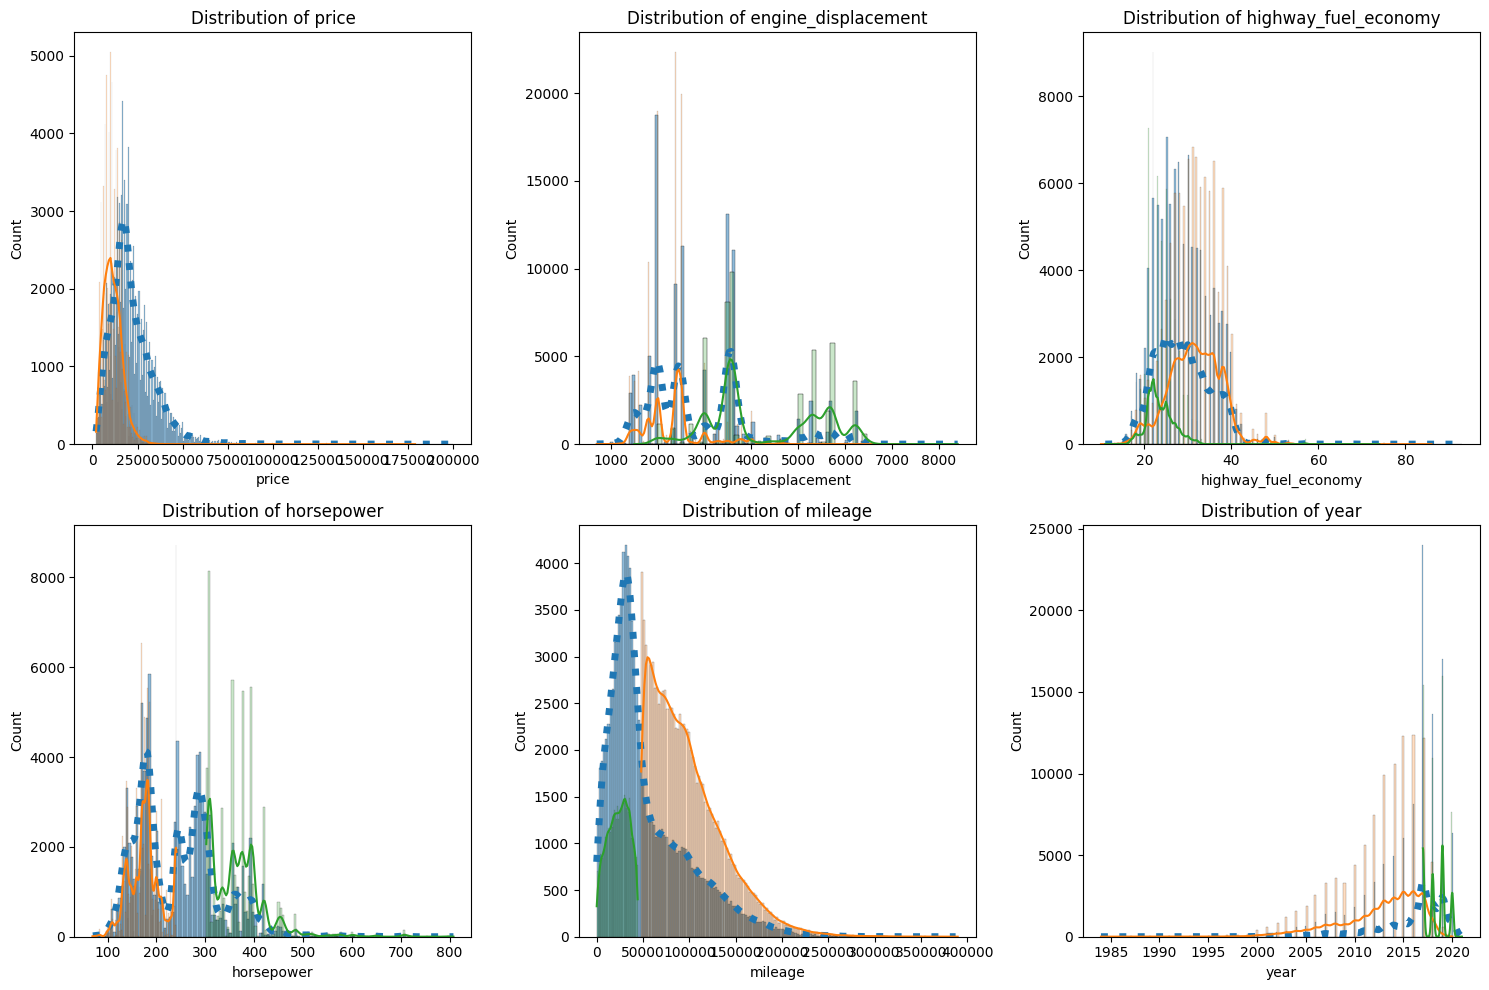

In [87]:

og_cols = ['price', 'engine_displacement', 
           'highway_fuel_economy', 'horsepower', 'mileage', 
           'year']
num_cols = len(og_cols)

# Calculate the number of rows and columns needed for subplots
num_rows = (num_cols + 2) // 3  # Ceiling division to ensure we have enough rows
num_cols = min(num_cols, 3)  # Limit the number of columns to 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10)) 

for i, col in enumerate(og_cols):
    row_idx = i // num_cols
    col_idx = i % num_cols

    if num_rows == 1:
        ax = axes[col_idx]
    else:
        ax = axes[row_idx, col_idx]

    sns.histplot(small_df[col], ax=ax, kde=True, line_kws={
        'lw': 5, 'ls': ':'})
    sns.histplot(pc5_df[col], ax=ax, kde=True, alpha=0.25)
    sns.histplot(test_df[col], ax=ax, kde=True, alpha=0.25)
    
    ax.set_title('Distribution of ' + col)

# Adjust layout to prevent overlap of subplots
plt.tight_layout()
plt.show()

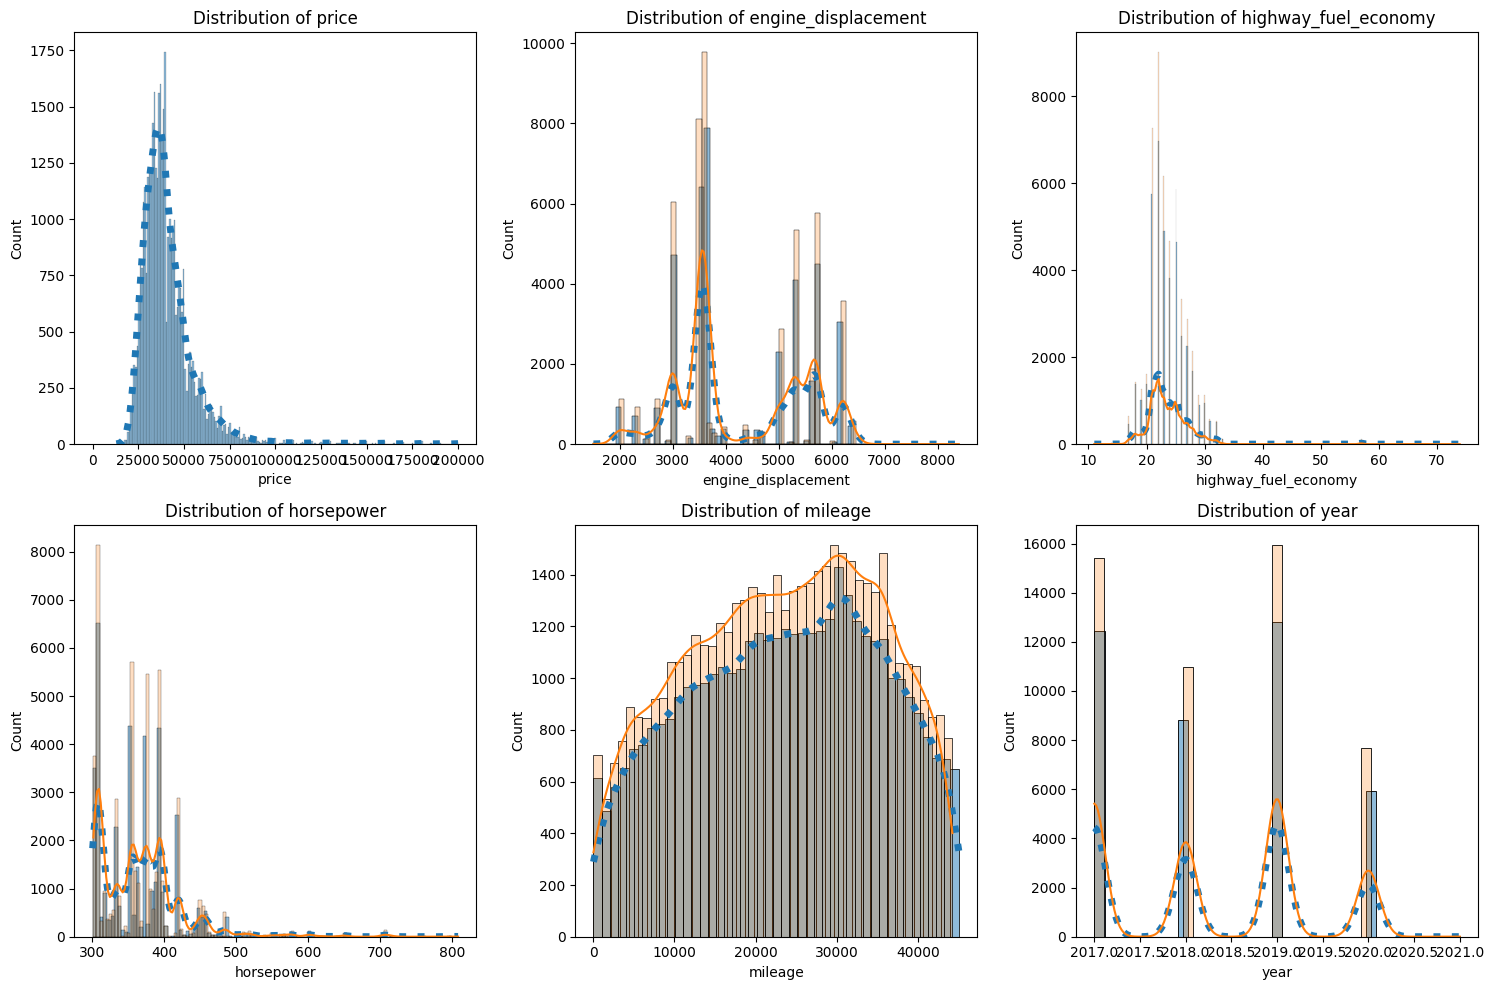

In [88]:

og_cols = ['price', 'engine_displacement', 
           'highway_fuel_economy', 'horsepower', 'mileage', 
           'year']
num_cols = len(og_cols)

# Calculate the number of rows and columns needed for subplots
num_rows = (num_cols + 2) // 3  # Ceiling division to ensure we have enough rows
num_cols = min(num_cols, 3)  # Limit the number of columns to 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10)) 

for i, col in enumerate(og_cols):
    row_idx = i // num_cols
    col_idx = i % num_cols

    if num_rows == 1:
        ax = axes[col_idx]
    else:
        ax = axes[row_idx, col_idx]

    sns.histplot(fixed_df[col], ax=ax, kde=True, line_kws={
        'lw': 5, 'ls': ':'})
    sns.histplot(test_df[col], ax=ax, kde=True, alpha=0.25)
    
    ax.set_title('Distribution of ' + col)

# Adjust layout to prevent overlap of subplots
plt.tight_layout()
plt.show()

## Data Preprocessing

In [32]:
#Creating a function to preprocess the data
def prep_data(dataset):
    
    dataset_cols = dataset.columns
    if 'price' in dataset_cols:
        dataset['log_price'] = np.log(dataset['price'])
    else:
        pass

    #Feature Engineering

    dataset['listed_date'] = pd.to_datetime(dataset['listed_date'])
    listed_year = dataset['listed_date'].dt.year
    dataset['age_at_listing'] = listed_year - dataset['year']


    dataset['length'] = pd.to_numeric(dataset['length'].astype(str).str.replace(' in', ''), errors='coerce')
    dataset['length'] = dataset['length'].fillna(dataset.groupby('body_type')['length'].transform('mean'))

    dataset['width'] = pd.to_numeric(dataset['width'].astype(str).str.replace(' in', ''), errors='coerce')
    dataset['width'] = dataset['width'].fillna(dataset.groupby('body_type')['width'].transform('mean'))

    dataset['height'] = pd.to_numeric(dataset['height'].astype(str).str.replace(' in', ''), errors='coerce')
    dataset['height'] = dataset['height'].fillna(dataset.groupby('body_type')['height'].transform('mean'))

    # dataset['wheelbase'] = pd.to_numeric(dataset['wheelbase'].astype(str).str.replace(' in', ''), errors='coerce')
    # dataset['wheelbase'] = dataset['wheelbase'].fillna(dataset.groupby('body_type')['wheelbase'].transform('mean'))

    dataset["car_vol"] = dataset["length"] * dataset["width"]* dataset["height"]

    dataset['listed_date'] = pd.to_datetime(dataset['listed_date'])
    listed_year = dataset['listed_date'].dt.year
    dataset['age_at_listing'] = listed_year - dataset['year']

    dataset['litres'] = (dataset['engine_displacement']/1000).astype(float)
    dataset = dataset.drop(['engine_displacement'], axis=1)

    col_encode = [ 'body_type', 'fuel_type', 'wheel_system']

    for col in col_encode:
        dataset = pd.concat([dataset,pd.get_dummies(dataset[col], prefix=col, drop_first= True)],axis = 1)
    # le = LabelEncoder()
    # for col in col_encode:
    #     new_col = col+'_enc'
    #     dataset[new_col] = le.fit_transform(dataset[col])

    dataset['hp_mile'] = dataset['horsepower'] * dataset['mileage']
    dataset['hp_hwfe'] = dataset['horsepower'] * dataset['highway_fuel_economy']
    dataset['hp_year'] = dataset['horsepower'] * dataset['year']
    dataset['hp_lit'] = dataset['horsepower'] * dataset['litres']
    dataset['hp_vol'] = dataset['horsepower'] * dataset['car_vol']
    dataset['hp2'] = dataset['horsepower']**2
    dataset['mile2'] = dataset['mileage']**2
    dataset['age2'] = dataset['age_at_listing']**2

    # fuel_type_map = {'Gasoline': 1, 'Diesel': 0, 'Flex Fuel Vehicle' : 0, 'Hybrid': 0, 'Biodiesel' : 0, 'Compressed Natural Gas' : 0  }

    # # Apply the mapping to the 'fuel_type' column
    # dataset['fuel_type_binary'] = dataset['fuel_type'].map(fuel_type_map)

    drop = ['price', 'back_legroom', 'wheelbase', 'latitude', 'longitude', 
            'listed_date', 'exterior_color']
    for col in drop:
        dataset = dataset.drop([col], axis=1)

    
    drop_enc= ['body_type', 'fuel_type', 'wheel_system']
    for col in drop_enc:
        dataset = dataset.drop([col], axis=1)
    return dataset

In [33]:
small_df = prep_data(small_df)

In [34]:
pc5_df = prep_data(pc5_df)

In [35]:
subset_df = prep_data(subset_df)

In [36]:
testing_df2 = prep_data(testing_df2)

In [37]:
fixed_df = prep_data(fixed_df)

In [38]:
test_df = prep_data(test_df)

In [39]:
small_df.head()

,height,highway_fuel_economy,horsepower,length,mileage,width,year,log_price,age_at_listing,car_vol,...,wheel_system_FWD,wheel_system_RWD,hp_mile,hp_hwfe,hp_year,hp_lit,hp_vol,hp2,mile2,age2
0,75.6,18,381,228.7,167184,79.9,2008,9.825256,12,1381448.628,...,False,False,63697104,6858,765048,2171.7,5.263319e+08,145161,27950489856,144
1,57.3,38,132,182.6,29451,69.9,2016,9.706377,4,731362.302,...,True,False,3887532,5016,266112,237.6,9.653982e+07,17424,867361401,16
2,58.2,34,248,194.6,14984,83.7,2019,10.595008,1,947962.764,...,False,True,3716032,8432,500712,496.0,2.350948e+08,61504,224520256,1
3,67.8,28,260,192.8,15697,75.4,2020,10.083682,0,985616.736,...,True,False,4081220,7280,525200,910.0,2.562604e+08,67600,246395809,0
4,56.3,33,255,184.5,6907,79.4,2020,10.533295,0,824755.590,...,False,False,1761285,8415,515100,510.0,2.103127e+08,65025,47706649,0


In [40]:
testing_df2.head()

,height,highway_fuel_economy,horsepower,length,mileage,width,year,log_price,age_at_listing,car_vol,...,wheel_system_FWD,wheel_system_RWD,hp_mile,hp_hwfe,hp_year,hp_lit,hp_vol,hp2,mile2,age2
0,74.0,20,420,229.5,33054,80.0,2017,10.766673,3,1358640.000,...,False,False,13882680,8400,847140,2604.0,5.706288e+08,176400,1092566916,9
1,70.6,24,278,212.3,18740,75.2,2019,10.518430,1,1127126.176,...,False,False,5209720,6672,561282,973.0,3.133411e+08,77284,351187600,1
2,64.1,29,237,181.1,7447,83.5,2020,10.619741,0,969310.585,...,False,False,1764939,6873,478740,474.0,2.297266e+08,56169,55457809,0
3,66.3,30,240,178.1,99590,81.8,2014,9.341369,6,965896.854,...,False,False,23901600,7200,483360,480.0,2.318152e+08,57600,9918168100,36
4,48.6,26,460,177.9,18599,77.4,2017,11.020529,3,669195.756,...,False,True,8555540,11960,927820,2852.0,3.078300e+08,211600,345922801,9


In [41]:
subset_df.head()

,height,highway_fuel_economy,horsepower,length,mileage,width,year,log_price,age_at_listing,car_vol,...,wheel_system_FWD,wheel_system_RWD,hp_mile,hp_hwfe,hp_year,hp_lit,hp_vol,hp2,mile2,age2
72469,58.1,36,185,191.1,21754,73.4,2017,9.687878,3,814953.594,...,True,False,4024490,6660,373145,444.0,1.507664e+08,34225,473236516,9
32789,67.8,26,171,174.7,164892,81.3,2010,8.006034,9,962970.858,...,False,False,28196532,4446,343710,427.5,1.646680e+08,29241,27189371664,81
72108,56.6,26,240,202.6,158478,74.2,2001,8.146130,19,850863.272,...,True,False,38034720,6240,480240,912.0,2.042072e+08,57600,25115276484,361
80232,78.4,16,411,232.1,109695,97.0,2014,10.545210,6,1765074.080,...,False,False,45084645,6576,827754,2548.2,7.254454e+08,168921,12032993025,36
46040,56.8,29,136,175.2,157838,66.7,2005,8.292799,15,663755.712,...,True,False,21465968,3944,272680,272.0,9.027078e+07,18496,24912834244,225


In [42]:
def split_data(dataset, random_st):
    global x_train, x_val_test, y_train, y_val_test, x_val, x_test, y_val, y_test
    #Must make the variables global to 
    #access the variables outside of the function

    columns_x = list(dataset.columns)
    if 'log_price' in columns_x:
        columns_x.remove('log_price')
    else:
        pass
    x_train, x_val_test, y_train, y_val_test = train_test_split(
        dataset[columns_x], dataset['log_price'], test_size=0.2, 
        random_state=random_st)
    x_val, x_test, y_val, y_test = train_test_split(
        x_val_test, y_val_test, test_size=0.5, random_state=123)
    
    #return x_train, x_val, x_test, y_train, y_val, y_test

In [43]:
def split_data_Q2(dataset, random_st):
    global x_train, y_train, x_test, y_test

    columns_x = list(dataset.columns)
    if 'log_price' in columns_x:
        columns_x.remove('log_price')
    else:
        pass
    x_train, x_test, y_train, y_test = train_test_split(
        dataset[columns_x], dataset['log_price'], test_size=0.2, 
        random_state=random_st)
    
    #return x_train, x_val, x_test, y_train, y_val, y_test

## Small Data (PC3 data) modeling

In [ ]:
split_data_Q2(small_df, 4)

In [ ]:
print(x_train.shape, x_test.shape)
#print(x_train.shape, x_test.shape)

In [ ]:
y_test_pc3 = y_test

In [ ]:
x_train.head()

In [ ]:
standard_scaler = preprocessing.StandardScaler()

standard_scaler.fit(x_train)
# transform
x_train_s_scaled = standard_scaler.transform(x_train)
#x_val_s_scaled = standard_scaler.transform(x_val)
x_test_s_scaled_pc3 = standard_scaler.transform(x_test)

### Boosting

In [ ]:
boost_car = GBR(n_estimators=1000,
learning_rate=0.2,
max_depth=3,
random_state=4)
boost_car.fit(x_train_s_scaled ,y_train)

In [ ]:
y_hat_test_boost = boost_car.predict(x_test_s_scaled_pc3)

In [ ]:
print('MSE on PC3 small test set:', mean_squared_error(
    y_test_pc3, y_hat_test_boost))

print('R squared on PC3 small test set:', r2_score(
    y_test_pc3, y_hat_test_boost))

## PC5 Data modeling

In [ ]:
split_data_Q2(pc5_df, 4)

In [ ]:
print(x_train.shape, x_test.shape)
#print(x_train.shape, x_test.shape)

In [ ]:
y_test_pc5 = y_test

In [ ]:
x_train.head()

In [ ]:
standard_scaler = preprocessing.StandardScaler()

standard_scaler.fit(x_train)
# transform
x_train_s_scaled = standard_scaler.transform(x_train)
#x_val_s_scaled = standard_scaler.transform(x_val)
x_test_s_scaled_pc5 = standard_scaler.transform(x_test)

In [ ]:
y_hat_test_boost = boost_car.predict(x_test_s_scaled_pc5)

In [ ]:
#print('MSE on training set:', mean_squared_error(y_train, y_hat_train_boost))
#print('MSE on validation set:', mean_squared_error(y_val, y_hat_val_boost))
print('MSE on PC5 test set:', mean_squared_error(
    y_test_pc5, y_hat_test_boost))

#print('R squared on training set:', r2_score(y_train, y_hat_train_boost))
#print('R squared on validation set:', r2_score(y_val, y_hat_val_boost))
print('R squared on PC5 small test set:', r2_score(
    y_test_pc5, y_hat_test_boost))

### Boosting

In [ ]:
boost_car = GBR(n_estimators=1000,
learning_rate=0.2,
max_depth=3,
random_state=4)
boost_car.fit(x_train_s_scaled ,y_train)

In [ ]:
y_hat_test_boost = boost_car.predict(x_test_s_scaled_pc5)

In [ ]:
print('MSE on test set:', mean_squared_error(y_test, y_hat_test_boost))

print('R squared on test set:', r2_score(y_test, y_hat_test_boost))

In [ ]:
y_hat_test_boost = boost_car.predict(x_test_s_scaled_pc3)

In [ ]:
print('MSE on PC3 small test set:', mean_squared_error(
    y_test_pc3, y_hat_test_boost))

print('R squared on PC3 small test set:', r2_score(
    y_test_pc3, y_hat_test_boost))

## Subset Data modeling

In [ ]:
split_data(subset_df, 4)

In [ ]:
print(x_train.shape, x_val.shape, x_test.shape)
#print(x_train.shape, x_test.shape)

In [ ]:
x_train.head()

In [ ]:
x_train.isna().sum()

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()

min_max_scaler.fit(x_train)
# transform
x_train_mm_scaled = min_max_scaler.transform(x_train)
x_val_mm_scaled = min_max_scaler.transform(x_val)
x_test_mm_scaled = min_max_scaler.transform(x_test)

In [ ]:
standard_scaler = preprocessing.StandardScaler()

standard_scaler.fit(x_train)
# transform
x_train_s_scaled = standard_scaler.transform(x_train)
x_val_s_scaled = standard_scaler.transform(x_val)
x_test_s_scaled = standard_scaler.transform(x_test)

In [ ]:
robust_scaler = preprocessing.RobustScaler()

robust_scaler.fit(x_train)
# transform
x_train_r_scaled = robust_scaler.transform(x_train)
x_val_r_scaled = robust_scaler.transform(x_val)
x_test_r_scaled = robust_scaler.transform(x_test)

### Boosting

In [ ]:
boost_car_subset = GBR(n_estimators=1000,
learning_rate=0.2,
max_depth=3,
random_state=4)
boost_car_subset.fit(x_train_s_scaled , y_train)


In [ ]:
y_hat_train_boost = boost_car_subset.predict(x_train_s_scaled)
y_hat_val_boost = boost_car_subset.predict(x_val_s_scaled)
y_hat_test_boost = boost_car_subset.predict(x_test_s_scaled)

In [ ]:
print('MSE on training set:', mean_squared_error(
    y_train, y_hat_train_boost))
print('MSE on validation set:', mean_squared_error(
    y_val, y_hat_val_boost))
print('MSE on test set:', mean_squared_error(
    y_test, y_hat_test_boost))

print('R squared on training set:', r2_score(
    y_train, y_hat_train_boost))
print('R squared on validation set:', r2_score(
    y_val, y_hat_val_boost))
print('R squared on test set:', r2_score(
    y_test, y_hat_test_boost))

In [ ]:
r2_boost = r2_score(y_test, y_hat_test_boost)

### Boosting Hyperparameter tuning

In [ ]:
# Define the parameter grid
param_grid = {
    'n_estimators': [500, 1000],
    'learning_rate': [0.2, 0.4],
    'max_depth': [3]
}

# Initialize the GBR model
boost_car = GBR(random_state=4)

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=boost_car, param_grid=param_grid, cv=4, n_jobs=-1, verbose=2)

# Fit the GridSearchCV object to the training data
grid_search.fit(x_val_s_scaled, y_val)

# Extract the best hyperparameters
best_params = grid_search.best_params_
print(f"Best hyperparameters: {best_params}")

# Train the final model with the best hyperparameters
best_boost_car = GBR(**best_params, random_state=0)
best_boost_car.fit(x_train_s_scaled, y_train)

# Make predictions on the test set
y_hat_boost = best_boost_car.predict(x_test_s_scaled)

# Evaluate the model
r_squared = r2_score(y_test, y_hat_boost)
print(f"R-squared: {r_squared}")


In [ ]:
best_params

After many different tests using different parameters and 4 & 5 fold cross validation I have arrived to the conclusion that the best parameters for the boosting algorithm are: <br>
learning_rate: 0.2 <br>
max_depth: 3 <br>
n_estimators: 1000 <br>

#### Testing with pc3 with response data

In [ ]:
y_testing = testing_df2['log_price']

In [ ]:
testing_df2 = testing_df2.drop('log_price', axis=1)

In [ ]:
# standard_scaler.fit(testing_df2)

# # transform
# x_testing_scaled = standard_scaler.transform(testing_df2)

# testing_pred_test = boost_car.predict(x_testing_scaled)

# print(testing_pred_test)

In [ ]:
# print('MSE on pc3 test data:', mean_squared_error(
#     y_testing, testing_pred_test))

# print('R squared on pc3 test data:', r2_score(
#     y_testing, testing_pred_test))

### Bagging

In [ ]:
bag_car = RF(max_features=x_train_mm_scaled.shape[1], random_state=0)
bag_car.fit(x_train_mm_scaled , y_train)

In [ ]:
ax = subplots(figsize=(8,8))[1]
y_hat_bag = bag_car.predict(x_test_mm_scaled)
ax.scatter(y_hat_bag , y_test)
np.mean((y_test - y_hat_bag)**2)

In [ ]:
bag_car = RF(max_features=x_train_mm_scaled.shape[1],
n_estimators=500,
random_state=0).fit(x_train_mm_scaled , y_train)
y_hat_bag = bag_car.predict(x_test_mm_scaled)
np.mean((y_test - y_hat_bag)**2)

In [ ]:
r_squared = r2_score(y_test, y_hat_bag)
print(f"R-squared: {r_squared}")

#### Random Forest

In [ ]:
RF_car = RF(max_features=6,
random_state=0).fit(x_train_mm_scaled , y_train)
y_hat_RF = RF_car.predict(x_test_mm_scaled)
np.mean((y_test - y_hat_RF)**2)

In [ ]:
r_squared = r2_score(y_test, y_hat_RF)
print(f"R-squared: {r_squared}")

In [ ]:
feature_names = list(x_train.columns)
feature_imp = pd.DataFrame(
{'importance':RF_car.feature_importances_},
index=feature_names)
feature_imp.sort_values(by='importance', ascending=False)

### Support Vector Machines

In [ ]:
model_svr = SVR(C= 8)
model_svr.fit(x_train_s_scaled, y_train)

In [ ]:
y_pred = model_svr.predict(x_test_s_scaled)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

In [ ]:
sns.lineplot(x=[min(y_test), max(y_test)], y=[min(y_test), max(y_test)], 
             linestyle='--', color='r', label='Perfect Prediction')
sns.scatterplot(x=y_test, y=y_pred, label='Actual vs Predicted')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.title("Actual vs Predicted Values with Perfect Prediction Line of SVR")
plt.show()

In [ ]:
residuals = y_test - y_pred
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot for SVR Regression")
plt.show()

### hyperparameter tuning SVR

In [ ]:
params_svr = {
    'kernel': ['linear', 'rbf'],
    'C': [ 8, 9, 10],
    'gamma': ['scale', 'auto'],
}

In [ ]:
grid_search_svr = GridSearchCV(SVR(), 
                               param_grid=params_svr, cv=5, 
                               scoring='r2', n_jobs=-1)

In [ ]:
grid_search_svr.fit(x_val_s_scaled, y_val)

In [ ]:
print("Best SVR Parameters:", grid_search_svr.best_params_)

In [ ]:
reg_best_svr = grid_search_svr.best_estimator_
reg_best_svr

In [ ]:
best_svr = SVR(C= 9, gamma= 'auto', kernel = 'rbf')

In [ ]:
best_svr.fit(x_train_s_scaled, y_train)

In [ ]:
y_best_pred_svr = best_svr.predict(x_test_s_scaled)

In [ ]:
mse_svr = mean_squared_error(y_test, y_best_pred_svr)
r2_svr = r2_score(y_test, y_best_pred_svr)

print("SVR Metrics:")
print("Mean Squared Error:", mse_svr)
print("R-squared:", r2_svr)

## Predicting on the test data

Since Boosting ensemble method performed the best I will be using my best boosting model for predicing on the test set

In [ ]:
test_df = prep_data(test_df)

In [ ]:
test_df = test_df.drop('log_price', axis=1)

In [ ]:
test_df.shape

In [ ]:
standard_scaler.fit(test_df)

# transform
x_final_scaled = standard_scaler.transform(test_df)

# Make predictions on the test set using the boosting model
final_pred_test = boost_car_subset.predict(x_final_scaled)

# Print the predictions
print(final_pred_test)

In [ ]:
predictions_df = pd.DataFrame({'predictions': final_pred_test})

header = pd.DataFrame({
    'predictions': [21108082, 'MegumiFushiguro', round(r2_boost,3), 
                    'Boosting']
})

header

output_df = pd.concat([header, predictions_df], axis=0)

output_df.to_csv('predictions_output2.csv', index=False, header=False)

In [ ]:
test_df.columns

In [ ]:
subset_df.columns

## If I was smart

In [44]:
# Get the column names of fixed_df
fixed_columns = fixed_df.columns

# Get the column names of test_df
test_columns = test_df.columns

fixed_columns

test_columns

Index(['height', 'highway_fuel_economy', 'horsepower', 'length', 'mileage',
       'width', 'year', 'log_price', 'age_at_listing', 'car_vol', 'litres',
       'body_type_Coupe', 'body_type_Hatchback', 'body_type_Pickup Truck',
       'body_type_SUV / Crossover', 'body_type_Sedan', 'body_type_Van',
       'body_type_Wagon', 'fuel_type_Gasoline', 'fuel_type_Hybrid',
       'wheel_system_4X2', 'wheel_system_AWD', 'wheel_system_FWD',
       'wheel_system_RWD', 'hp_mile', 'hp_hwfe', 'hp_year', 'hp_lit', 'hp_vol',
       'hp2', 'mile2', 'age2'],
      dtype='object')

In [45]:
columns_to_drop = ['year', 'height', 'length', 'width', 'hp_hwfe', 'hp_year', 'hp_lit', 'hp_vol', 'hp2', 'age2']

fixed_df.drop(columns=columns_to_drop, inplace=True)
test_df.drop(columns=columns_to_drop, inplace=True)


In [46]:
# Get the column names of fixed_df
fixed_columns = fixed_df.columns

# Get the column names of test_df
test_columns = test_df.columns

fixed_columns

test_columns

Index(['highway_fuel_economy', 'horsepower', 'mileage', 'log_price',
       'age_at_listing', 'car_vol', 'litres', 'body_type_Coupe',
       'body_type_Hatchback', 'body_type_Pickup Truck',
       'body_type_SUV / Crossover', 'body_type_Sedan', 'body_type_Van',
       'body_type_Wagon', 'fuel_type_Gasoline', 'fuel_type_Hybrid',
       'wheel_system_4X2', 'wheel_system_AWD', 'wheel_system_FWD',
       'wheel_system_RWD', 'hp_mile', 'mile2'],
      dtype='object')

In [47]:
split_data(fixed_df, 4)

In [48]:
standard_scaler = preprocessing.StandardScaler()

standard_scaler.fit(x_train)
# transform
x_train_s_scaled = standard_scaler.transform(x_train)
x_val_s_scaled = standard_scaler.transform(x_val)
x_test_s_scaled = standard_scaler.transform(x_test)

In [49]:
ifiwassmart_car_subset = GBR(n_estimators=1000,
learning_rate=0.2,
max_depth=3,
random_state=4)
ifiwassmart_car_subset.fit(x_train_s_scaled , y_train)

GradientBoostingRegressor(learning_rate=0.2, n_estimators=1000, random_state=4)

In [50]:
y_hat_val_boost = ifiwassmart_car_subset.predict(x_val_s_scaled)
y_hat_test_boost = ifiwassmart_car_subset.predict(x_test_s_scaled)

In [51]:
print('MSE on validation set:', mean_squared_error(
    y_val, y_hat_val_boost))
print('MSE on test set:', mean_squared_error(
    y_test, y_hat_test_boost))

print('R squared on validation set:', r2_score(
    y_val, y_hat_val_boost))
print('R squared on test set:', r2_score(
    y_test, y_hat_test_boost))

MSE on validation set: 0.01824811625089015
MSE on test set: 0.01793603735474281
R squared on validation set: 0.7723565736053801
R squared on test set: 0.8346121024757789


In [52]:
r2_boost = r2_score(y_test, y_hat_test_boost)

In [53]:
# Get the column names of fixed_df
fixed_columns = fixed_df.columns

# Get the column names of test_df
test_columns = test_df.columns


columns_only_in_fixed = fixed_columns.difference(test_columns)
columns_only_in_test = test_columns.difference(fixed_columns)

print("\nColumns only in fixed_df:")
print(columns_only_in_fixed)
print("\nColumns only in test_df:")
print(columns_only_in_test)


Columns only in fixed_df:
Index([], dtype='object')

Columns only in test_df:
Index([], dtype='object')


In [54]:
test_df = test_df.drop('log_price', axis=1)

In [55]:
standard_scaler.fit(test_df)

# transform
x_final_scaled = standard_scaler.transform(test_df)

# Make predictions on the test set using the boosting model
final_pred_test = ifiwassmart_car_subset.predict(x_final_scaled)

# Print the predictions
print(final_pred_test)

[10.26964791 10.35767847 10.56285196 ... 10.96768256 10.40083575
 10.27754498]


In [56]:
logged_prices = np.log(response_df['price'])

r2 = r2_score(logged_prices, final_pred_test)

print("R^2 score with logged prices:", r2)



R^2 score with logged prices: 0.6824491446236509


In [ ]:
predictions_df = pd.DataFrame({'predictions': final_pred_test})

header = pd.DataFrame({
    'predictions': [21108082, 'MegumiFushiguro', round(r2_boost,3), 
                    'Boosting']
})

header

output_df = pd.concat([header, predictions_df], axis=0)

output_df.to_csv('predictions_output4.csv', index=False, header=False)

## ChatGPT Suggestion

In [57]:
# Importing necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.impute import KNNImputer
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np

# Define a function for feature engineering
def feature_engineering(df):
    # Additional feature transformations
    # Example: Create interaction terms between 'horsepower' and 'mileage'
    df['hp_mile_interaction'] = df['horsepower'] * df['mileage']
    
    # More advanced imputation techniques
    imputer = KNNImputer(n_neighbors=5)  # Use KNN imputer for missing values
    df_imputed = imputer.fit_transform(df)  
    df = pd.DataFrame(df_imputed, columns=df.columns)  # Convert back to DataFrame after imputation
    
    return df

feature_engineering(fixed_df)

split_data(fixed_df, 4)

# Define models
models = {
    'RandomForest': RandomForestRegressor(),
    'SVR': SVR(),
    'MLP': MLPRegressor()
}
# Perform hyperparameter tuning using GridSearchCV for each model
param_grid = {
    'RandomForest': { 'model__n_estimators': [100, 200, 300], 'model__max_depth': [None, 5, 10] },
    'SVR': { 'model__kernel': ['linear', 'rbf'], 'model__C': [0.1, 1, 10] },  # Adjusted parameter names
    'MLP': { 'model__hidden_layer_sizes': [(50,), (100,), (50, 50)], 'model__alpha': [0.0001, 0.001, 0.01] }
}

best_models = {}

for name, model in models.items():
    pipeline = Pipeline([
        ('imputer', KNNImputer()),
        ('scaler', StandardScaler()),
        ('model', model)
    ])
    
    grid_search = GridSearchCV(pipeline, param_grid[name], cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(x_train, y_train)
    
    best_models[name] = grid_search.best_estimator_
    print(f'Best parameters for {name}:', grid_search.best_params_)

# Implement stacking ensemble method
estimators = [
    ('RandomForest', best_models['RandomForest']),
    ('SVR', best_models['SVR']),
    ('MLP', best_models['MLP'])
]

stacking_regressor = StackingRegressor(estimators=estimators, final_estimator=RandomForestRegressor())
stacking_regressor.fit(x_train, y_train)

# Evaluate the stacking ensemble model
y_pred_stacking = stacking_regressor.predict(x_test)
mse_stacking = mean_squared_error(y_test, y_pred_stacking)
r2_stacking = r2_score(y_test, y_pred_stacking)

print('MSE for Stacking Ensemble:', mse_stacking)
print('R^2 for Stacking Ensemble:', r2_stacking)



Best parameters for RandomForest: {'model__max_depth': 10, 'model__n_estimators': 300}
Best parameters for SVR: {'model__C': 1, 'model__kernel': 'rbf'}


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

Best parameters for MLP: {'model__alpha': 0.0001, 'model__hidden_layer_sizes': (50, 50)}


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

MSE for Stacking Ensemble: 0.02152690507016383
R^2 for Stacking Ensemble: 0.8015007719184724
